# Conhecendo o Data set


O objetivo do curso em questão foi desenvolver um sistema de avaliação imobiliária usando regressão linear

O dataset foi realizado no final de outro curso também estudado (data-science-modelo-regressao-linear-assimetria-statsmodel).

É uma amostra aleatória de tamanho 5000 de imóveis a venda no Rio de Janeiro.

In [0]:
import pandas as pd

In [87]:
dados_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-regressao-linear/dataset.csv', sep=';')
dados_df.head(7)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
5,1449993,143,5.119767,0.043398
6,464000,107,7.846771,0.157954


## Visualizando dados - Valor por Área

In [0]:
import numpy as np

valor = np.log(dados_df['Valor'])
area = np.log(dados_df['Area'])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

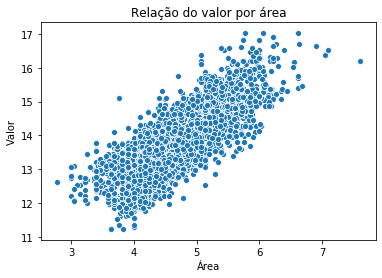

In [48]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Relação do valor por área')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')

plt.show()

# Regressão linear com mínimos quadrados


Podemos então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \theta_1 x_i + \theta_0 + \epsilon_i$$

Sendo $y_i$ é o valor de um determinado imóvel, $x_i$ é a área deste mesmo imóvel e o termo $\epsilon_i$ é o termo de erro (esperamos que pequeno) representando que existem fatores não levados em consideração para este modelo simples.

Supondo que temos $\theta_1$ e $\theta_0$, podemos fazer uma previsão através facilmente.

In [0]:
def prever(theta0, theta1, x_i):
    return theta1 * x_i + theta0 

Como vamos escolher as constântes $\theta_0$ e $\theta_1$?

Sabendo que podemos calcular a saída prevista com a função "prever" e sabendo qual é a saída real, é possível calcularmos o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [0]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que podemos ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, devemos somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

$$
EQM = \frac{1}{N}\sum^{N}_{i=0}(y_i - y^p_i)^2
$$

In [0]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto, y)]).mean()

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Isto é um problema conhecido na algebra linear como minímos quadrados e sua resolução dá as equações:

$$\theta_1 = correlacao(x, y) \times \frac{\sigma(y)}{\sigma(x)}$$

$$\theta_0 = \bar{y} - \alpha\bar{x}$$

Sendo $\bar{x}$ e $\bar{y}$ as médias dos valores de x e y, correlação(x, y) é a correlação entre os valores de x e y, e $\sigma(x)$, $\sigma(y)$ os desvios padrões de x e y.

Assim, vamos definir uma função para minimizar os valores de $\theta_1$ e $\theta_0$. 

In [0]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

Agora sim, podemos escolher valores para $\theta_0$ e $\theta_1$ e fazer nossa regressão!

In [53]:
theta1, theta0 = minimos_quadrados(area, valor)
print("Theta 1:", theta1, "\nTheta 0:", theta0)

Theta 1: 1.273136797389051 
Theta 0: 7.806465474455786


Com thetas em mãos, podemos prever os resultados

In [0]:
previsao = prever(theta0, theta1, area)

Para avaliar se nossa regressão está de fato representando o que queremos, vamos verificar na função de erro:

In [55]:
soma_erro_quadratico_medio(previsao, valor)

0.2922746317391325

## Visualizando dados - Resultados previstos

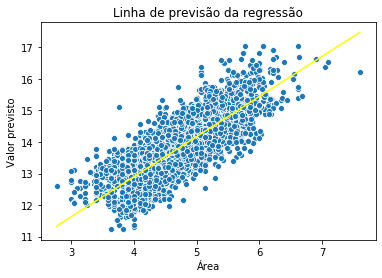

In [56]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area, y=previsao, color='yellow')

ax.set_title('Linha de previsão da regressão')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto')

plt.show()

## Métrica R²

Uma das métricas mais utilizadas é a $R^2$ também conhecida como coeficiente de determinação.

Esta métrica varia entre 0 e 1, indicando, em percentagem quanto o modelo consegue explicar nossos dados. Quanto maior o $R^2$, mais explicativo é nosso modelo, ou seja mais ele se ajusta ao conjunto de dados utilizado.

Podemos dizer o quanto nosso modelo é explicativo através da variância de nosso valores de y, ou seja comparando as variâncias dos valores de imóveis previstos e a variância utilizando o valor real do imóveis.

$$
R^2 = 1 - \frac{\sum^{N}_{i=0}(y_i - y^p_i)^2}{\sum^{N}_{i=0}(y_i - y_i)^2}
$$


In [0]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [58]:
r_2(previsao, valor)

0.641975652487156

## Exemplo prático

Após processado o data set, quanto deve custar um apartamento de 72$m^2$ no Rio de Janeiro?

In [59]:
#Normalizar dados utilziando função logarítmica
area_normalizada = np.log(72)

#Calculando previsão
previsao = prever(theta0, theta1, area_normalizada)

#Uma vez que foi utilizado a função logarítmica, 
#para obter o valor correto devemos voltar utilizando exponencial
np.exp(previsao)

568778.5698688689

## Limitações do método dos minímos quadrados

Quando nosso problema não envolve apenas uma variável independente, pode ser que o método dos quadrados mínimos fique muito caro do ponto de vista computacional. Note que apenas resolvemos este problema para uma variável (área), e se houvessem mais? Teriamos de refazer todas nossas contas usando algebra matricial.

A fórmula que determina os coeficientes da regressão seria:

$$
\Theta = (X'X)^{-1}X'y
$$

Existe uma procedimento de inversão matricial envolvido, o que é muito caro computacionalmente O($n^3$). Quando nosso conjunto de dados é muito grande e possuí muitas variáveis, um método iterativo, como o Gradiente Descendente pode ser mais eficiente.

# Regressão linear com o Gradiente Descendente

O método do gradiente descendente é um método de otimização iterativo e não analítico como o mínimos quadrados. A ideia deste método é utilizar o gradiente da função a ser otimizada para indicar o sentido de minimização da função. Em geral, as bibliotecas prontas de Machine Learning usam este método para otimizar seus modelos.

Começamos com valores aleatórios para nosso parâmetros $\theta_1$ e $\theta_0$ e iterativamente vamos atualizando seus valores usando o gradiente da função de custo (erro quadrático médio).

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Para isto, vamos utilizar a técnica do gradiente descendente. Primeiramente, vamos definir a derivada da função de custo em relação a $\theta_1$ e $\theta_0$.

$$
\frac{\delta}{\delta\theta_0}EQM = \frac{2}{N}\sum^{N}_{i=0}y(x_i) - y_i
$$

$$
\frac{\delta}{\delta\theta_1}EQM = \frac{2}{N}\sum^{N}_{i=0}(y(x_i) - y_i)x_i
$$

In [0]:
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1

Agora queremos realizar o processo de otimização de nossa função de custo. Para isto, vamos atulizar o valor de nossas variáveis $\theta_0$ e $\theta_1$. Vamos criar um parâmetro novo para nosso algoritmo, vamos chamá-lo de taxa de aprendizado ($\alpha$), será um número pequeno para dizer o quanto queremos atualizar nossos parâmetros.

$$
\theta_0 = \theta_0 - \alpha\frac{\delta}{\delta\theta_0}EQM
$$

$$
\theta_1 = \theta_1 - \alpha\frac{\delta}{\delta\theta_1}EQM
$$

In [0]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

## Exemplo prático

Finalmente, vamos inicializar nosso valores iniciais aleatóriamente e executar o gradiente descendente várias vezes.

In [64]:
import random

# Utilizar o seed para quando gerar um valor aleatorio
# que ele seja replicável
random.seed(42)

theta0 = random.random()
theta1 = random.random()

#Ajustando thetas
for i in range(10000):
    if i % 1000 == 0:
        previsao = prever(theta0, theta1, area)
        print(soma_erro_quadratico_medio(previsao, valor))

    theta0, theta1 = gradienteDescendente(theta0, theta1, area, valor, 0.01)

168.22116350027565
0.6593029559163838
0.49986004915533633
0.40968166189261285
0.35867819178219007
0.3298314354554666
0.3135161661459121
0.30428850776975325
0.2990694900819959
0.29611769619076367


In [65]:
print("Theta 1:", theta1, "\nTheta 0:", theta0)

Theta 1: 1.3545668505867476 
Theta 0: 7.424430958943951


In [66]:
previsao = prever(theta0, theta1, area)
r_2(previsao, valor)

0.6393131110901085

Agora utilizando o gradiente descendente, quanto deve custar um apartamento de 72$m^2$ no Rio de Janeiro?

In [67]:
area_normalizada = np.log(72)
previsao = prever(theta0, theta1, area_normalizada)
np.exp(previsao)

549883.1690804189

## Visualizando dados - Resultados da regressão com gradiente descendente

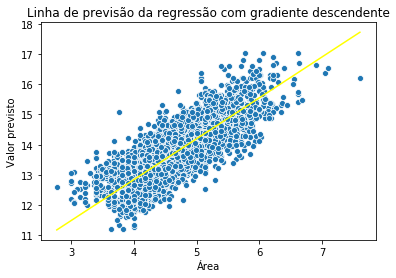

In [69]:
previsao = prever(theta0, theta1, area)

ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area, y=previsao, color='yellow')

ax.set_title('Linha de previsão da regressão com gradiente descendente')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto')

plt.show()

## Utilizando SK-Learn

Agora que foi entendendo como funciona regressão linear por baixo dos panos, vamos utilizar a lib do SK-Learn

In [75]:
from sklearn.linear_model import LinearRegression

linear_regration = LinearRegression()

area_array = np.array(area)
area_matrix = area_array.reshape(len(area), 1)

#Ajustando modelos (calculando thetas)
linear_regration.fit(area_matrix, valor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

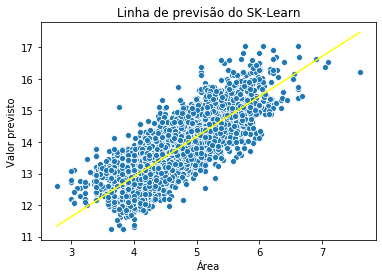

In [78]:
previsao = linear_regration.predict(area_matrix)

ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area, y=previsao, color='yellow')

ax.set_title('Linha de previsão do SK-Learn')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto')

plt.show()

In [79]:
from sklearn.metrics import r2_score

r2_score(valor, previsao)

0.6419756524871572

Previsão do SK-Learn para valor de um apartamento de 72$m^2$?

In [85]:
area_normalizada = np.log(72)
area_normalizada_matrix = [[area_normalizada]]

previsao = liner_regration.predict(area_normalizada_matrix)

np.exp(previsao)

array([568778.56986888])

# Gradiente descendente vs Mínimos Quadrados

Os resultados foram bem parecidos, mas e qual deles utilziar?

A limitação do método dos mínimos quadrados é para grande conjuntos de dados.

Logo, é melhor utilizar o Gradiente Descendente quando temos uma grande quantidade de dados disponíveis e os Mínimos Quadrados quando nosso conjunto de dados é pequeno. 

# Regressão multivariável

Desta vez, não temos apenas uma variável. Então, nosso problema vai ficar um pouco maior, em vez de otimizarmos dois parâmetros, devemos otimizar $n+1$ parâmetros, sendo $n$ o número de variáveis do problema. No nosso caso, temos três variáveis no problema, portanto iremos otimizar no total quatro parâmetros. Então nossa hipótese de forma geral será:

$$
y(x_0, x_1, ..., x_n) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + ... + \theta_{n} x_{n-1}
$$

Como nosso problema possuí três variáveis, teremos:

$$
y(x_0, x_1, x_2) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + \theta_3 x_2
$$

Podemos definir isto a partir da notação matricial:

$$
y(X) = \theta_0 + X \bullet \theta 
$$

Desta forma, é facil prever usando nosso modelo.

In [0]:
def prever(theta, X):
    return np.dot(X, theta)

Agora, vamos a função de custo. Usaremos o erro quadrático médio.

$$
EQM = \frac{1}{N}\sum_{i=0}^{N}(y_{i}-y_{i}^{p}(x_{i}))^2
$$

Devemos minimizar nossa função de custo, para isto usamos o gradiente descendente. Nele, usamos a derivada de nossa função de custo, definida como:

$$
EQM' = \frac{1}{2N}\sum_{i=0}^{N}(y^{p}_{i}(x_i) - y_{i})x_{i}
$$

In [0]:
def gradienteDescendente(theta, X, y, alpha):
    previsto = prever(theta, X)
    erro = previsto - y
    
    gradiente = np.dot(X.T, erro) / (2*len(X))
    
    theta -= alpha*gradiente

Obtendo novas variaveis do Data set

In [0]:
#Novas variaveis do data set
dist_Praia = np.log(dados_df['Dist_Praia'] + 1)
dist_Farmacia = np.log(dados_df['Dist_Farmacia'] + 1)

valor = np.array(valor)
area = np.array(area)
dist_Praia = np.array(dist_Praia)
dist_Farmacia = np.array(dist_Farmacia)

X = np.array([area, dist_Praia, dist_Farmacia]).T
y = valor

O métoto c_ do numpy vai apenas colocar mais um atributo em todas amostras de nosso conjunto. Este ultimo atributo será sempre unitário, e será responsável pela variável independente $\theta_0$.

Após isto, vamos criar nossos pesos de forma aleatória e executar a nossa otimização.

In [93]:
X = np.c_[np.ones(X.shape[0]), X] 

theta = np.random.rand(X.shape[1])

for i in range(7000):
    previsto = prever(theta, X)
    custo = soma_erro_quadratico_medio(prever(theta, X), y)
    
    if i % 1000 == 0:
        print(custo)
    
    gradienteDescendente(theta, X, y, 0.1)

63.7213573504878
0.43868583458538896
0.2593470325071042
0.19602293428535617
0.17363468299111892
0.16571890043160128
0.1629201224401112


In [94]:
theta

array([ 9.16882841,  1.08751064, -0.47712961,  0.03194316])

In [95]:
r_2(prever(theta, X), y)

0.8016417543983345

Agora acrescentando mais variaveis... Quanto custaria um apartamento de 72$m^2$, a 500$m$ da praia e 100$m$ de uma farmácia?

In [96]:
area_normalizada = np.log(72)

#Soma-se 1 pois logaritimo pois o log de 0 é dado como indefinido
dist_praia_normalizada = np.log(0.5 + 1)

dist_farmacia_normalizada = np.log(0.1 + 1)

np.exp(prever(theta, [1, area_normalizada, dist_praia_normalizada, dist_farmacia_normalizada]))

830126.5481828988

## Utilizando SK-Learn

In [98]:
from sklearn.linear_model import LinearRegression

linear_regration = LinearRegression()

linear_regration.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
r2_score(y, lr.predict(X))

0.8023047600430262